<a href="https://colab.research.google.com/github/solwinkel/Analitica_deportiva/blob/main/FINAL_Modelos_de_prediccion_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importación del dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import json

Mounted at /content/drive


In [4]:
#file_path = '/content/drive/MyDrive/8vo Cuatrimestre/Análitica del Deporte/Copia de Base - AD.xlsx'
file_path = '/content/drive/My Drive/1C 2024/Copia de Base - AD.xlsx'
df = pd.read_excel(file_path)

In [5]:
# Se crea un diccionario para mapear los nombres actuales a los nuevos nombres
column_mapping = {
    'Nombre Completo': 'nombre_completo',
    'Jugador anonimizado': 'jugador_anonimizado',
    'Minutos': 'minutos',
    'Avg Dist\n(Sess)\n(m)': 'avg_dist_sess_m',
    'ZONA 4\n19,9 A\n25,1 KM/H': 'zona_4_19.9_25.1_kmh',
    'ZONA 5\n> 25,1\nKM/H': 'zona_5_mas_25.1_kmh',
    '#ACELE\nRACIONES\nINTENSAS': 'num_aceleraciones_intensas',
    '#DES\nACELERACIONES\nINTENSAS': 'num_desaceleraciones_intensas',
    '# ACEL\n+ DESINTENSAS': 'num_acel_desintensas',
    '#CANTIDAD\nSPRINTS\nTOTAL': 'num_sprints_total',
    'PROMEDIO \nESFUERZOS \nREPETIDOS': 'prom_esfuerzos_repetidos',
    'Max. Vel (km/h)': 'max_vel_kmh',
    'Metros/min': 'metros_min',
    'Tiempo': 'tiempo',
    'Rival': 'rival',
    'Número de fecha del torneo': 'num_fecha_torneo',
    'Torneo': 'torneo',
    'Fecha': 'fecha',
    'Categoria de Partido': 'categoria_partido',
    'Posición': 'posicion',
    'Posición Habitual': 'posicion_habitual',
    'Gol?': 'gol',
    'Asistencia?': 'asistencia',
    'Lesión?': 'lesion',
    'Edad': 'edad',
    'Peso': 'peso',
    'Altura': 'altura'
}

df.rename(columns=column_mapping, inplace=True)

In [6]:
df = df.drop(columns=['nombre_completo', 'lesion', 'metros_min'])

In [7]:
df.head(10)

,jugador_anonimizado,minutos,avg_dist_sess_m,zona_4_19.9_25.1_kmh,zona_5_mas_25.1_kmh,num_aceleraciones_intensas,num_desaceleraciones_intensas,num_acel_desintensas,num_sprints_total,prom_esfuerzos_repetidos,...,torneo,fecha,categoria_partido,posicion,posicion_habitual,gol,asistencia,edad,peso,altura
0,1,50,4880,371,171,60,46,106,9,30,...,Libertadores,2023-04-04,Importante,NaN,Lateral / Volante,0,0,23,60,166
1,2,50,5310,310,145,37,53,90,6,25,...,Libertadores,2023-04-04,Importante,NaN,Lateral / Volante,0,0,25,70,177
2,3,50,6082,477,47,30,54,84,2,24,...,Libertadores,2023-04-04,Importante,NaN,Volante / Extremo,0,0,27,70,178
3,4,50,4755,215,85,37,44,81,7,24,...,Libertadores,2023-04-04,Importante,NaN,Delantero,0,0,33,91,190
4,5,50,5300,270,73,28,41,69,5,24,...,Libertadores,2023-04-04,Importante,NaN,Delantero,0,0,23,82,184
5,6,50,4836,266,24,30,34,64,2,19,...,Libertadores,2023-04-04,Importante,NaN,Lateral,0,0,29,73,177
6,7,50,5113,270,14,30,28,58,2,16,...,Libertadores,2023-04-04,Importante,NaN,Lateral,0,0,26,72,175
7,8,50,4595,174,14,25,28,53,1,16,...,Libertadores,2023-04-04,Importante,NaN,Defensor Central,0,0,22,86,186
8,9,50,5518,167,19,14,37,51,1,19,...,Libertadores,2023-04-04,Importante,NaN,Volante Central,0,0,21,78,188
9,10,50,756,36,29,11,1,12,3,4,...,Libertadores,2023-04-04,Importante,NaN,Volante Ofensivo / Extremo,0,0,32,62,168


## EDA

#### Nulos y duplicados

In [8]:
df.columns

Index(['jugador_anonimizado', 'minutos', 'avg_dist_sess_m',
       'zona_4_19.9_25.1_kmh', 'zona_5_mas_25.1_kmh',
       'num_aceleraciones_intensas', 'num_desaceleraciones_intensas',
       'num_acel_desintensas', 'num_sprints_total', 'prom_esfuerzos_repetidos',
       'max_vel_kmh', 'tiempo', 'rival', 'num_fecha_torneo', 'torneo', 'fecha',
       'categoria_partido', 'posicion', 'posicion_habitual', 'gol',
       'asistencia', 'edad', 'peso', 'altura'],
      dtype='object')

In [9]:
# Verificar si hay valores nulos y duplicados en el df
nulos = df.isnull().sum()
print("Valores nulos por columna:\n",nulos)

duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Valores nulos por columna:
 jugador_anonimizado                0
minutos                            0
avg_dist_sess_m                    0
zona_4_19.9_25.1_kmh               0
zona_5_mas_25.1_kmh                0
num_aceleraciones_intensas         0
num_desaceleraciones_intensas      0
num_acel_desintensas               0
num_sprints_total                  0
prom_esfuerzos_repetidos           0
max_vel_kmh                        0
tiempo                             0
rival                              0
num_fecha_torneo                   0
torneo                             0
fecha                              0
categoria_partido                  0
posicion                         873
posicion_habitual                  0
gol                                0
asistencia                         0
edad                               0
peso                               0
altura                             0
dtype: int64
Número de filas duplicadas: 0


#### Estadisticas descriptivas

In [10]:
estadisticas = df.describe()
print("Estadísticas descriptivas:\n", estadisticas)

Estadísticas descriptivas:
        jugador_anonimizado     minutos  avg_dist_sess_m  zona_4_19.9_25.1_kmh  \
count           875.000000  875.000000       875.000000             875.00000   
mean             10.972571   40.712000      4315.698286             222.29600   
min               1.000000    2.000000       123.000000               0.00000   
25%               5.000000   34.000000      3623.500000             138.00000   
50%              10.000000   47.000000      4834.000000             211.00000   
75%              16.000000   49.000000      5294.500000             293.00000   
max              29.000000   54.000000      6500.000000             649.00000   
std               7.349041   12.872257      1419.803260             113.06856   

       zona_5_mas_25.1_kmh  num_aceleraciones_intensas  \
count           875.000000                  875.000000   
mean             50.392000                   26.219429   
min               0.000000                    0.000000   
25%       

#### Visualizaciones

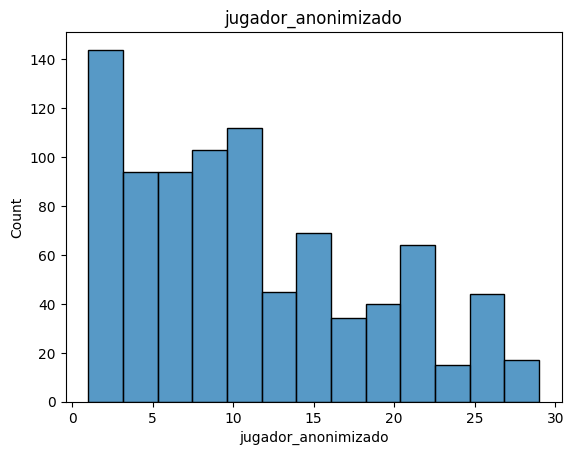

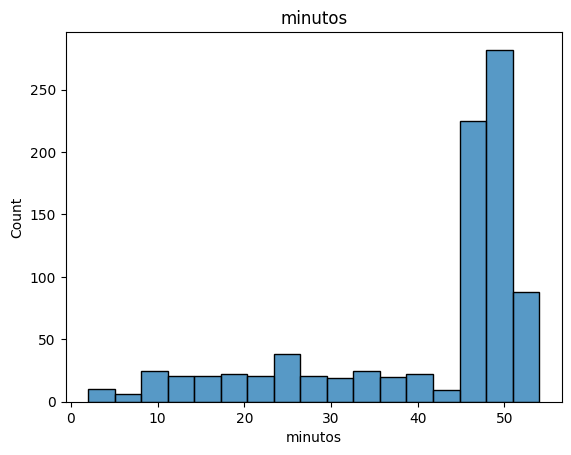

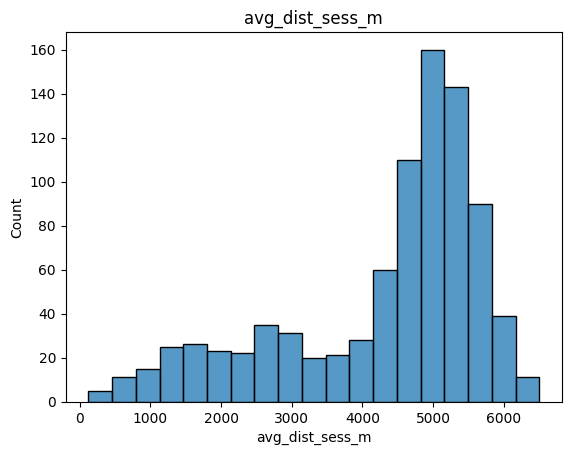

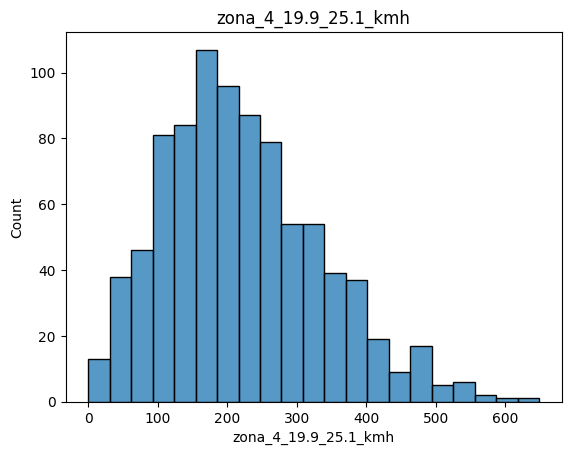

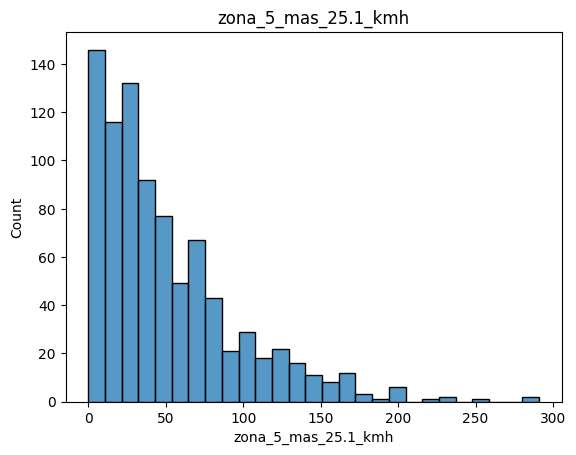

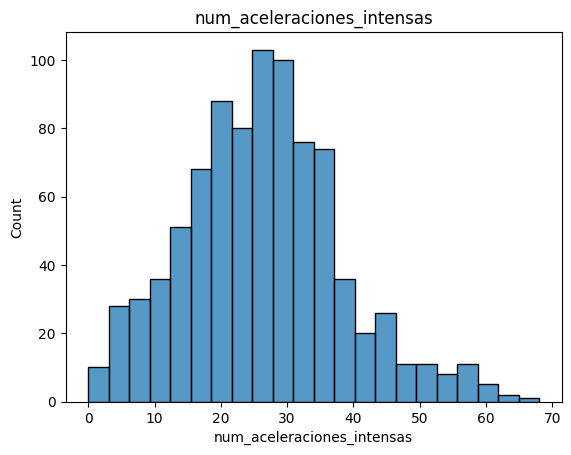

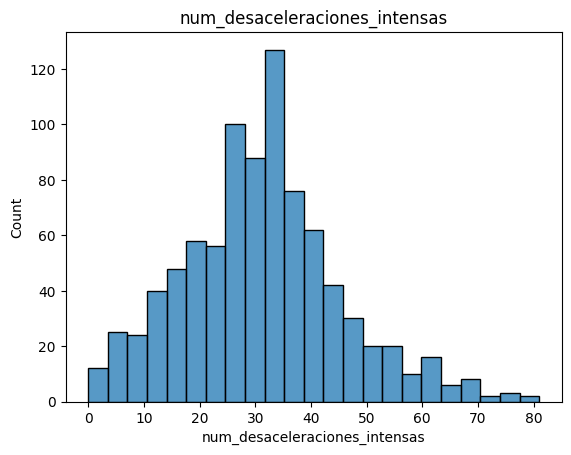

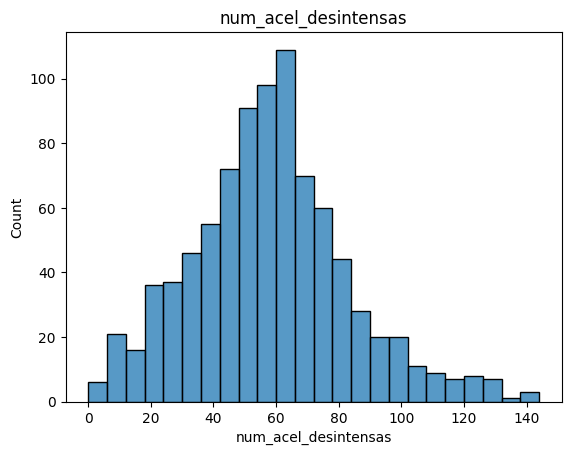

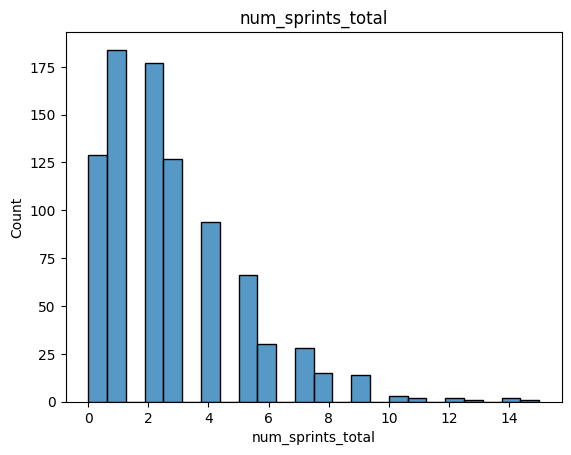

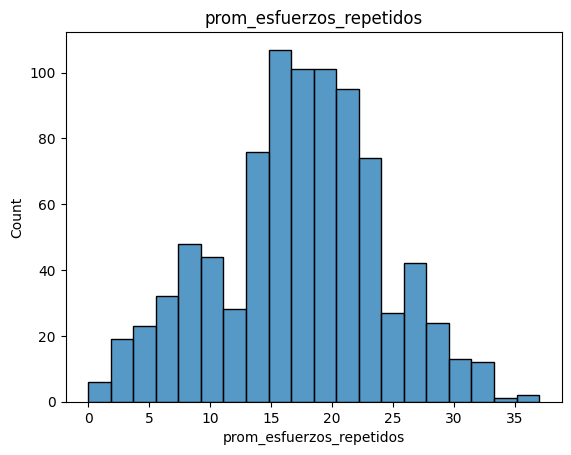

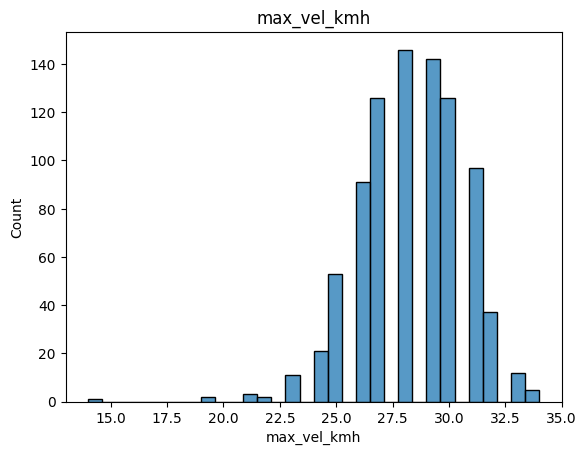

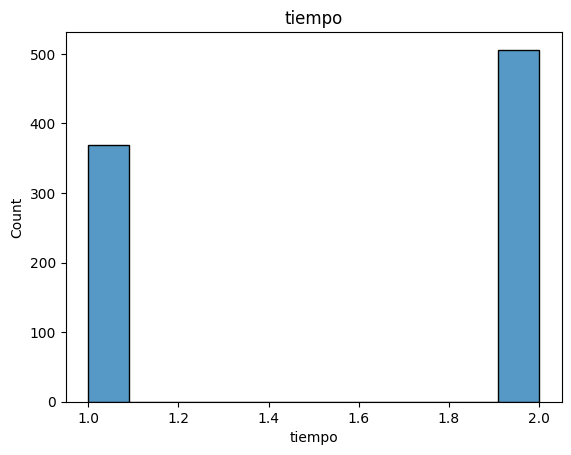

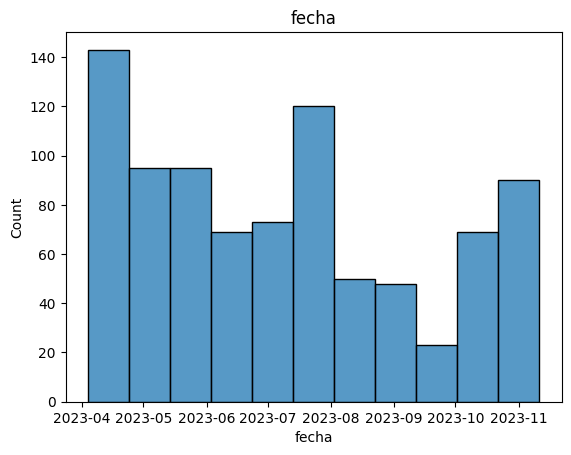

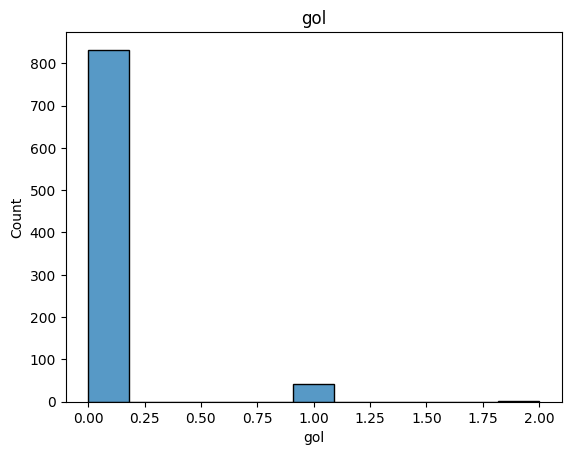

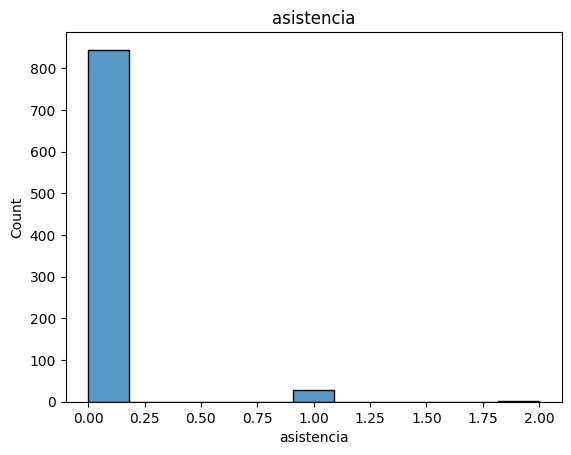

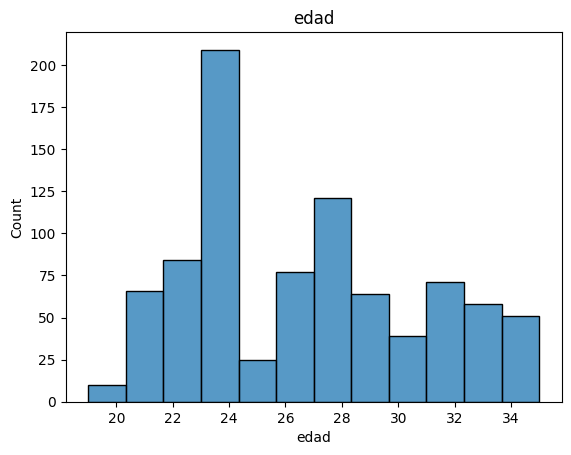

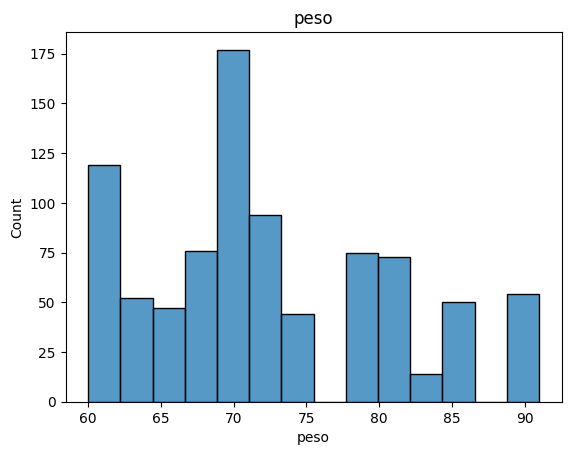

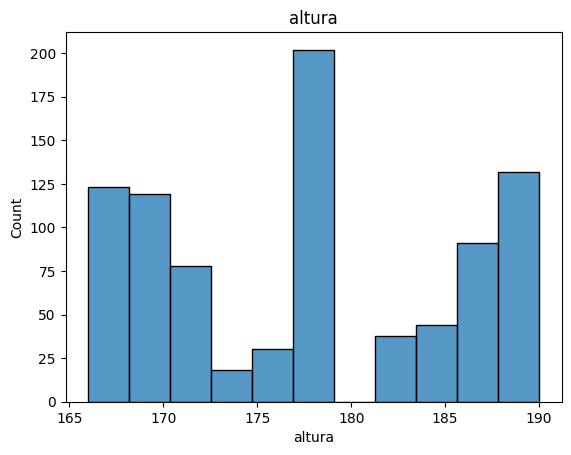

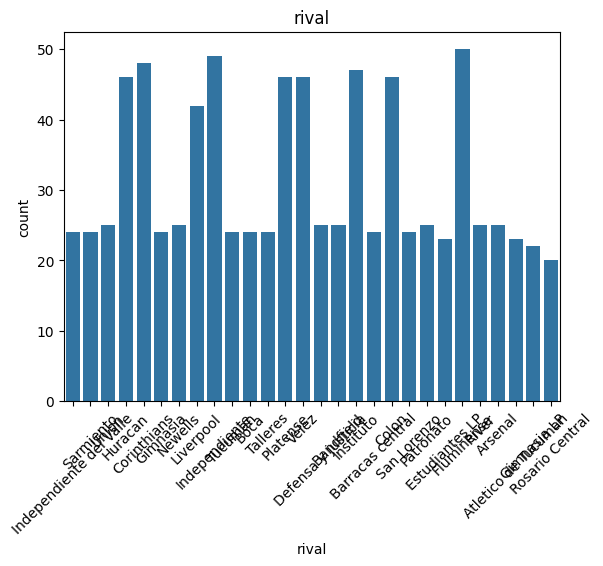

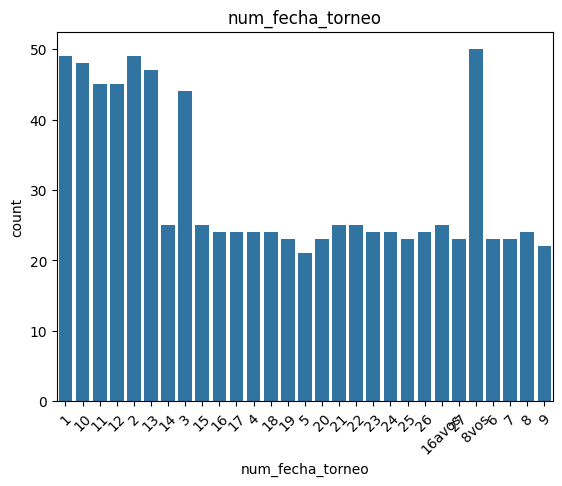

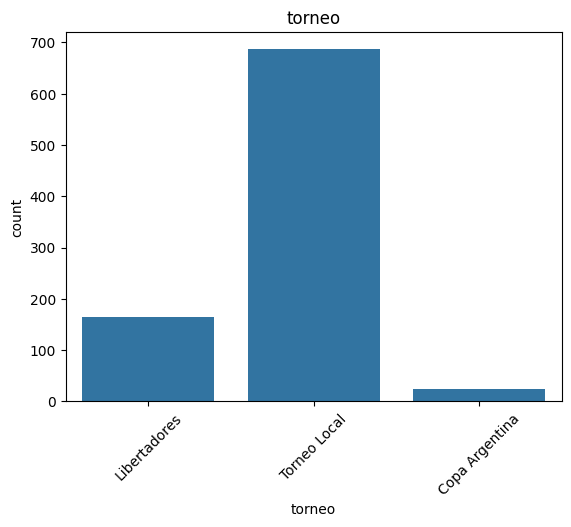

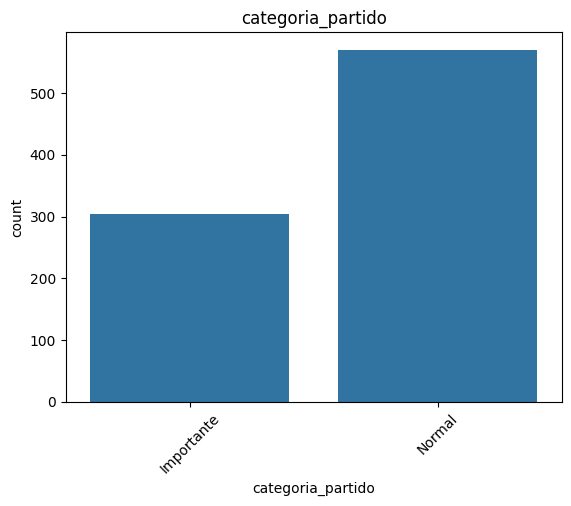

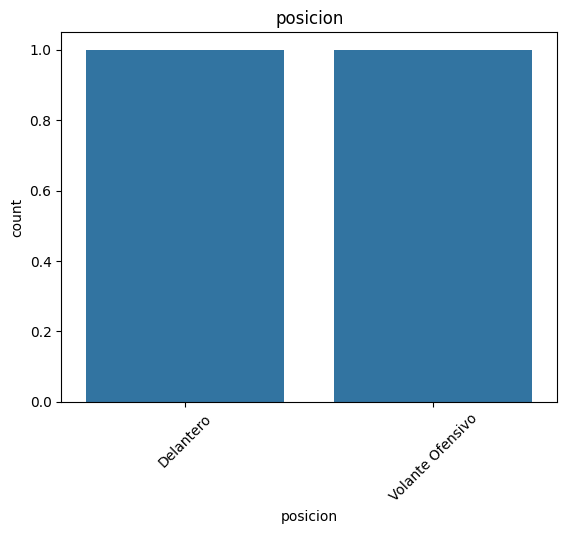

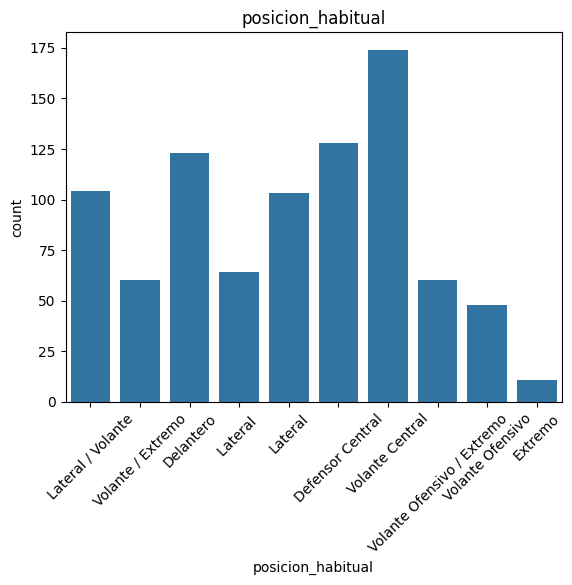

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para variables numéricas
for columna in df.columns:
    if df[columna].dtype != 'object':
        sns.histplot(df[columna])
        plt.title(columna)
        plt.show()

# Gráficos de barras para variables categóricas
for columna in df.columns:
    if df[columna].dtype == 'object':
        sns.countplot(data=df, x=columna)
        plt.title(columna)
        plt.xticks(rotation=45)
        plt.show()

## Split en train y test

In [12]:
from sklearn.model_selection import train_test_split

data_grouped = df

data_grouped['fecha'] = pd.to_datetime(data_grouped['fecha'])

train_list = []
test_list = []

grouped = data_grouped.groupby('jugador_anonimizado')

for jugador, group in grouped:
    group = group.sort_values(by='fecha')
    split_idx = int(len(group) * 0.8)

    train_list.append(group.iloc[:split_idx])
    test_list.append(group.iloc[split_idx:])

train_df = pd.concat(train_list)
test_df = pd.concat(test_list)

print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (692, 24)
Test set shape: (183, 24)


## Generación del umbral

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Diccionario de agregaciones
agg_dict = {
    'minutos': 'sum',
    'avg_dist_sess_m': 'sum',
    'zona_4_19.9_25.1_kmh': 'sum',
    'zona_5_mas_25.1_kmh': 'sum',
    'num_aceleraciones_intensas': 'sum',
    'num_desaceleraciones_intensas': 'sum',
    'num_acel_desintensas': 'sum',
    'num_sprints_total': 'sum',
    'prom_esfuerzos_repetidos': 'first',
    'max_vel_kmh': 'first',
    'tiempo': 'first',
    'rival': 'first',
    'num_fecha_torneo': 'first',
    'torneo': 'first',
    'categoria_partido': 'first',
    'posicion': 'first',
    'posicion_habitual': 'first',
    'gol': 'sum',
    'asistencia': 'sum',
    'edad': 'first',
    'peso': 'first',
    'altura': 'first'
}

data_grouped = train_df.groupby(['jugador_anonimizado', 'fecha']).agg(agg_dict).reset_index()
test_df = test_df.groupby(['jugador_anonimizado', 'fecha']).agg(agg_dict).reset_index()
columns_to_normalize = [col for col in agg_dict if (agg_dict[col] == 'sum')]

In [14]:
data_grouped['max_vel_kmh'].head()

0    30
1    31
2    31
3    31
4    34
Name: max_vel_kmh, dtype: int64

In [15]:
import pandas as pd

intervalos_jugadores = {}

for jugador, group in data_grouped.groupby('jugador_anonimizado'):
    intervalos = {}
    for variable in columns_to_normalize:
        lower_percentile = round(group[variable].quantile(0.80), 3)
        intervalos[f"{variable}_predictor"] = lower_percentile
    intervalos_jugadores[jugador] = intervalos

intervalos_list = []

for jugador, intervalos in intervalos_jugadores.items():
    intervalos_flat = {'jugador_anonimizado': jugador}
    intervalos_flat.update(intervalos)
    intervalos_list.append(intervalos_flat)

intervalos_df = pd.DataFrame(intervalos_list)

intervalos_df['max_vel_kmh_predictor'] = train_df.groupby(['jugador_anonimizado', 'fecha'])['max_vel_kmh'].transform('mean')


In [16]:
intervalos_df.head()

,jugador_anonimizado,minutos_predictor,avg_dist_sess_m_predictor,zona_4_19.9_25.1_kmh_predictor,zona_5_mas_25.1_kmh_predictor,num_aceleraciones_intensas_predictor,num_desaceleraciones_intensas_predictor,num_acel_desintensas_predictor,num_sprints_total_predictor,gol_predictor,asistencia_predictor,max_vel_kmh_predictor
0,1,97.0,9668.0,620.0,248.0,78.0,69.0,146.0,13.0,0.0,0.0,31.5
1,2,58.0,7154.8,408.0,79.2,54.4,59.6,118.2,5.0,0.0,0.0,29.5
2,3,94.6,11001.8,741.8,90.6,61.4,76.4,135.2,5.0,0.0,0.0,28.5
3,4,97.4,8762.2,373.0,140.8,61.4,75.0,136.8,8.0,1.0,0.0,30.0
4,5,78.8,8290.2,377.4,57.6,53.0,57.6,111.2,4.0,0.0,0.0,26.5


In [17]:
# Se une el df de intervalos con los datos agrupados por jugador y fecha
train_df = pd.merge(data_grouped, intervalos_df, on='jugador_anonimizado', how='left')


test_df = pd.merge(test_df, intervalos_df, on='jugador_anonimizado', how='left')

test_df['max_vel_kmh_predictor'].head(10)

0    31.5
1    31.5
2    31.5
3    31.5
4    31.5
5    31.5
6    31.5
7    31.5
8    31.5
9    29.5
Name: max_vel_kmh_predictor, dtype: float64

In [18]:
train_df.describe()

,jugador_anonimizado,fecha,minutos,avg_dist_sess_m,zona_4_19.9_25.1_kmh,zona_5_mas_25.1_kmh,num_aceleraciones_intensas,num_desaceleraciones_intensas,num_acel_desintensas,num_sprints_total,...,avg_dist_sess_m_predictor,zona_4_19.9_25.1_kmh_predictor,zona_5_mas_25.1_kmh_predictor,num_aceleraciones_intensas_predictor,num_desaceleraciones_intensas_predictor,num_acel_desintensas_predictor,num_sprints_total_predictor,gol_predictor,asistencia_predictor,max_vel_kmh_predictor
count,414.000000,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,11.330918,2023-06-17 04:45:13.043478272,68.070048,7262.644928,379.028986,84.932367,44.717391,53.400966,98.118357,4.630435,...,9328.158454,497.835749,122.088406,58.304348,70.243961,128.027053,6.639614,0.115459,0.003865,28.677536
min,1.000000,2023-04-04 00:00:00,2.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3997.200000,193.000000,21.000000,18.800000,29.200000,48.000000,1.000000,0.000000,0.000000,25.000000
25%,5.000000,2023-05-02 00:00:00,41.000000,4478.750000,218.250000,32.000000,28.000000,32.000000,59.250000,2.000000,...,8290.200000,377.400000,87.400000,45.600000,57.600000,103.000000,4.400000,0.000000,0.000000,26.500000
50%,10.000000,2023-06-07 00:00:00,77.000000,8227.000000,360.000000,67.000000,44.000000,55.000000,101.000000,4.000000,...,9668.000000,477.400000,94.400000,54.600000,69.000000,127.600000,5.100000,0.000000,0.000000,29.000000
75%,17.000000,2023-07-25 00:00:00,97.000000,9964.500000,502.750000,110.750000,60.000000,71.000000,129.000000,6.000000,...,10722.900000,582.000000,156.000000,65.000000,76.400000,140.000000,8.000000,0.000000,0.000000,30.000000
max,29.000000,2023-11-11 00:00:00,102.000000,12367.000000,1122.000000,542.000000,116.000000,143.000000,251.000000,27.000000,...,11663.800000,904.000000,258.200000,106.200000,131.400000,238.400000,15.200000,1.000000,0.800000,31.500000
std,7.478729,NaN,30.760851,3287.772287,211.001920,74.347592,23.396360,28.019599,50.403966,3.825636,...,1807.103420,166.256693,64.313809,18.177892,21.753381,38.510465,3.484587,0.298345,0.055536,1.696172


## Modelo 1: Regresión Lineal

In [ ]:
df2.columns

Index(['jugador_anonimizado', 'minutos', 'avg_dist_sess_m',
       'zona_4_19.9_25.1_kmh', 'zona_5_mas_25.1_kmh',
       'num_aceleraciones_intensas', 'num_desaceleraciones_intensas',
       'num_acel_desintensas', 'num_sprints_total', 'max_vel_kmh', 'gol',
       'asistencia', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
       'posicion_habitu

Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
       'posicion_habitual_Volante Central',
       'posicion_habitual_Volante Ofensivo',
       'posicion_habitual_Volante Ofensivo / Extremo'],
      dtype='object')
   Real  Predicción
0    50   77.925918
1    99   77.925918
2    40   77.925918
3    37   83.134623
4    

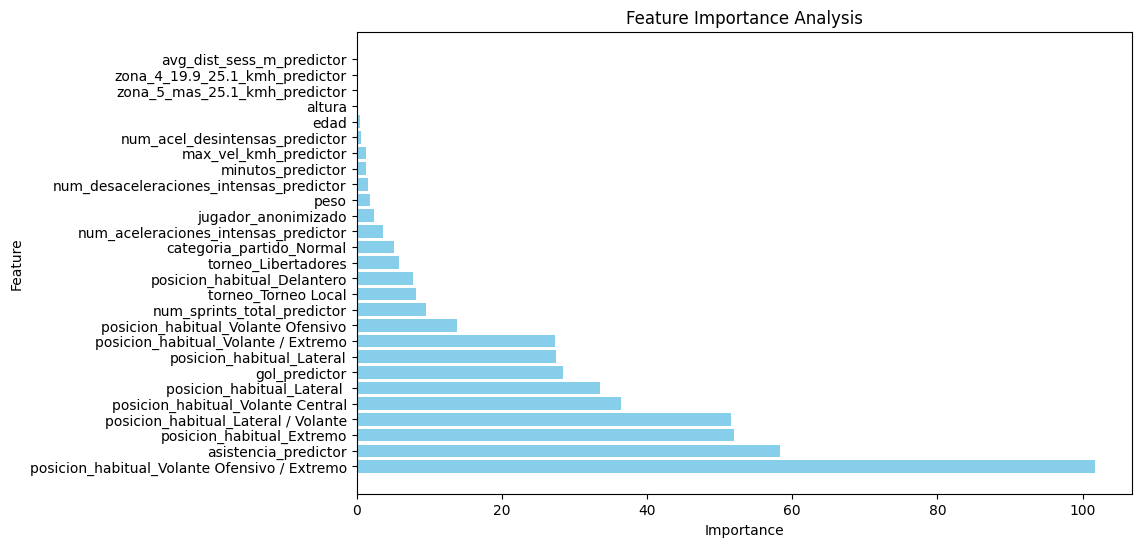

Mean Absolute Error (MAE) 'minutos': 22.228160404131767
Mean Squared Error (MSE) 'minutos': 694.2029076520848
Root Mean Squared Error (RMSE) 'minutos': 26.347730597758982
R-squared (R²) 'minutos': 0.3251428109730249
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
       'posicion_habitual_Volante Central',
       'posi

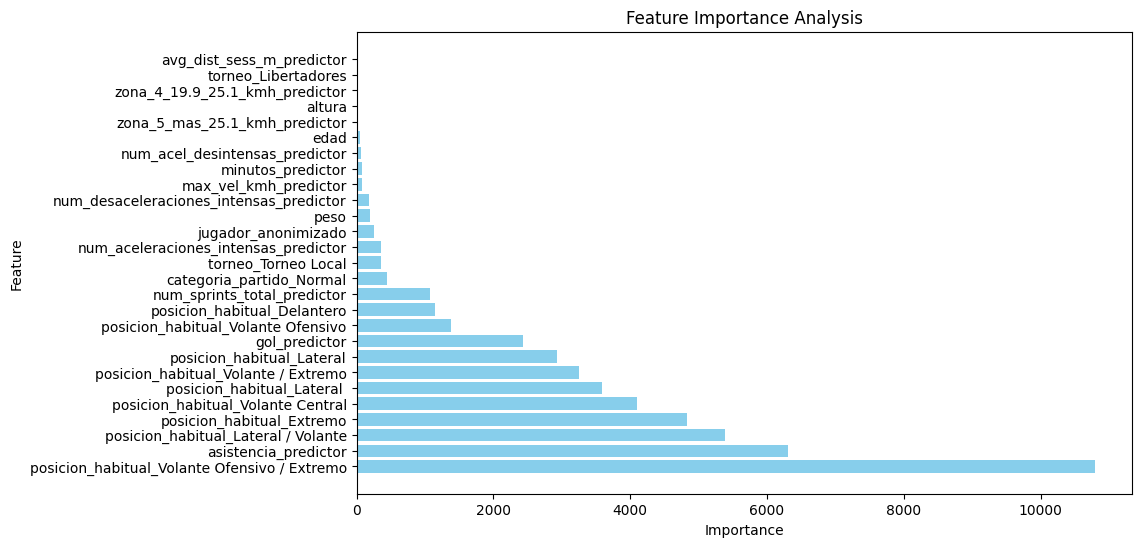

Mean Absolute Error (MAE) 'avg_dist_sess_m': 2322.2269817420765
Mean Squared Error (MSE) 'avg_dist_sess_m': 7815660.392325768
Root Mean Squared Error (RMSE) 'avg_dist_sess_m': 2795.6502628772737
R-squared (R²) 'avg_dist_sess_m': 0.2886908639374398
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
       'posicion_habitua

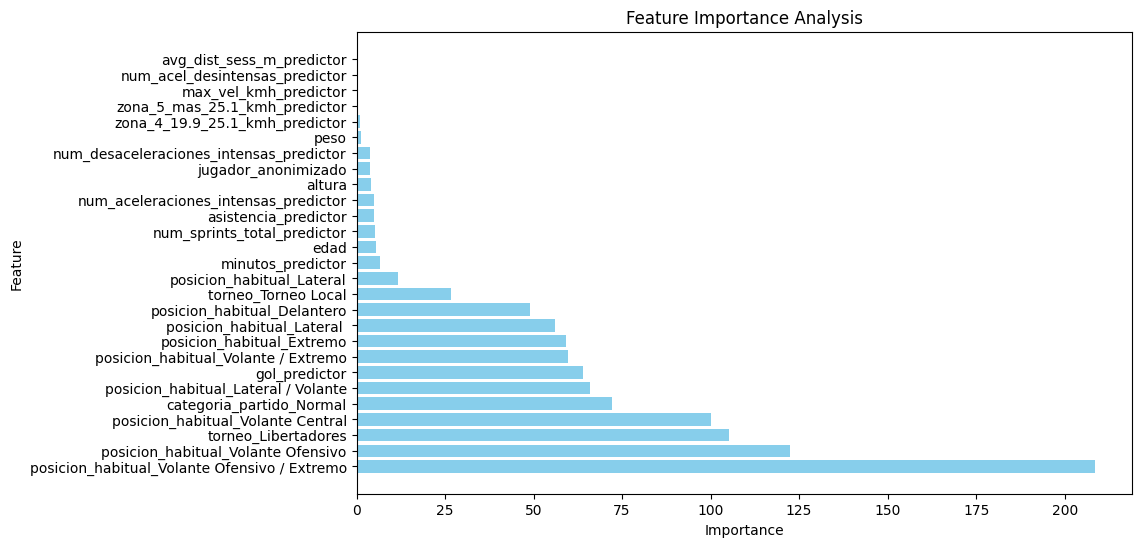

Mean Absolute Error (MAE) 'zona_4_19.9_25.1_kmh': 142.58963001055363
Mean Squared Error (MSE) 'zona_4_19.9_25.1_kmh': 29144.944688270876
Root Mean Squared Error (RMSE) 'zona_4_19.9_25.1_kmh': 170.71890547994641
R-squared (R²) 'zona_4_19.9_25.1_kmh': 0.2759899845244642
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
   

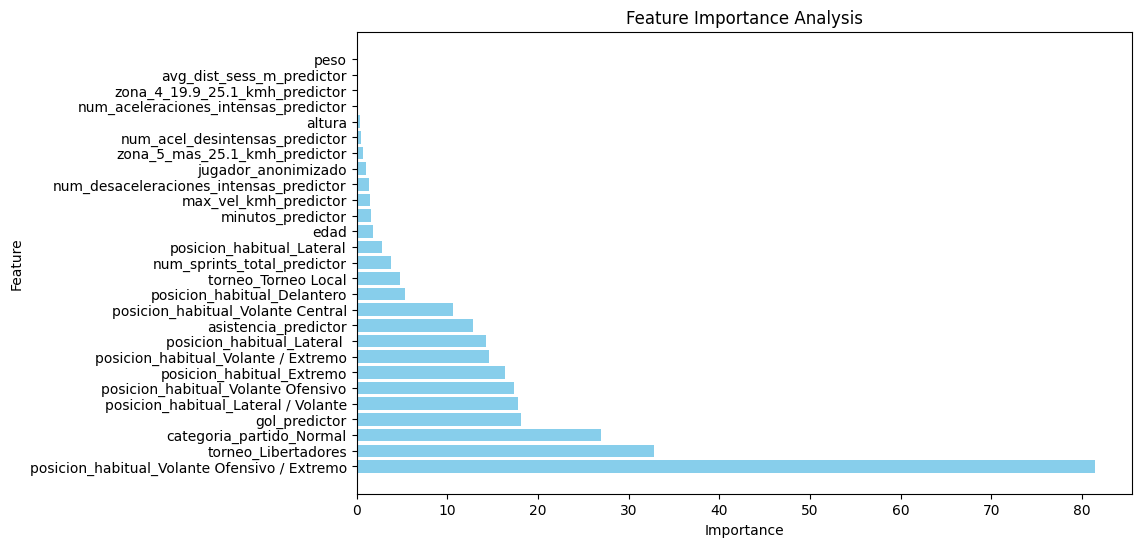

Mean Absolute Error (MAE) 'zona_5_mas_25.1_kmh': 44.288419933599954
Mean Squared Error (MSE) 'zona_5_mas_25.1_kmh': 3314.5486760039153
Root Mean Squared Error (RMSE) 'zona_5_mas_25.1_kmh': 57.57211717493039
R-squared (R²) 'zona_5_mas_25.1_kmh': 0.2245238609669925
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
       '

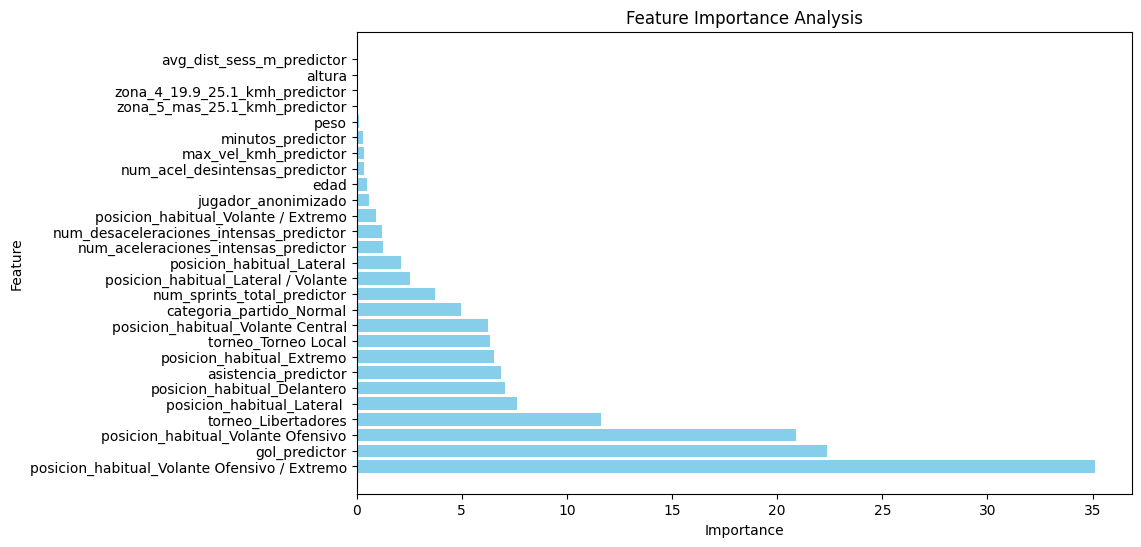

Mean Absolute Error (MAE) 'num_aceleraciones_intensas': 15.468566596090666
Mean Squared Error (MSE) 'num_aceleraciones_intensas': 380.0125735873457
Root Mean Squared Error (RMSE) 'num_aceleraciones_intensas': 19.493911192660793
R-squared (R²) 'num_aceleraciones_intensas': 0.1855417821462172
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_

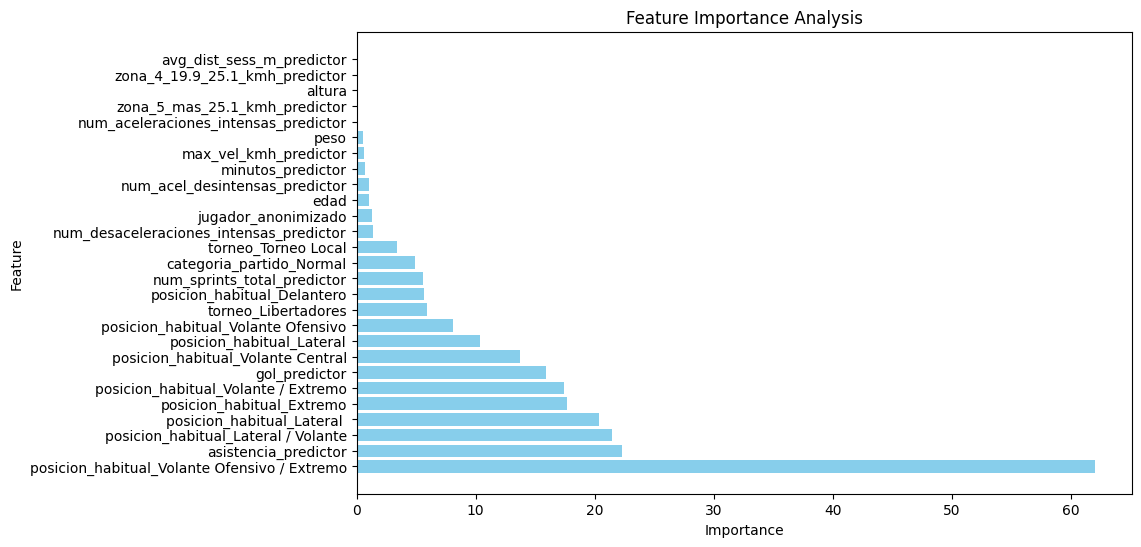

Mean Absolute Error (MAE) 'num_desaceleraciones_intensas': 18.199182149777997
Mean Squared Error (MSE) 'num_desaceleraciones_intensas': 500.94626422159297
Root Mean Squared Error (RMSE) 'num_desaceleraciones_intensas': 22.381828884646424
R-squared (R²) 'num_desaceleraciones_intensas': 0.2583139963225378
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posic

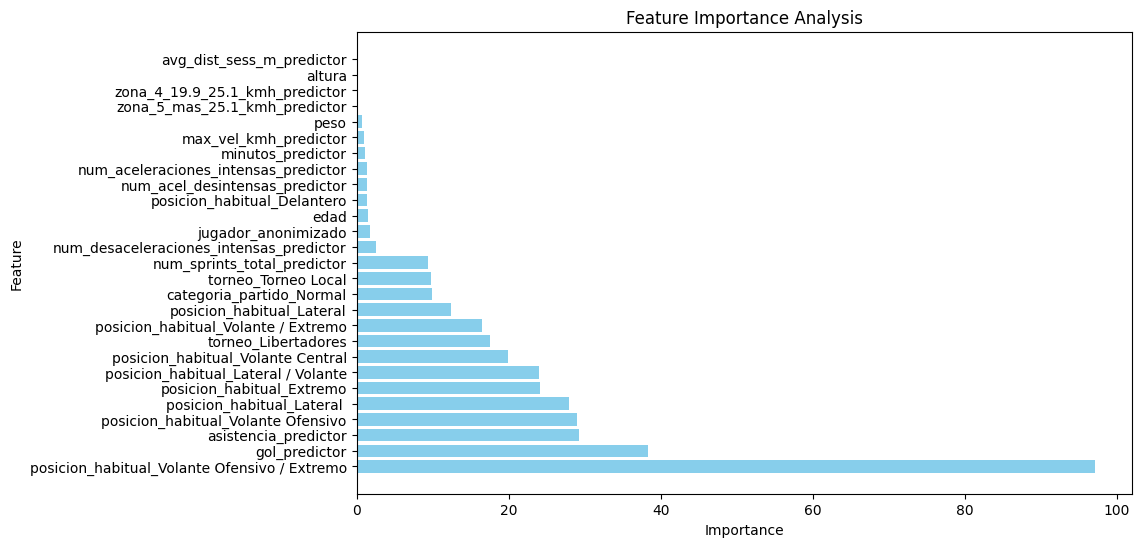

Mean Absolute Error (MAE) 'num_acel_desintensas': 33.15521624185789
Mean Squared Error (MSE) 'num_acel_desintensas': 1694.1087198935363
Root Mean Squared Error (RMSE) 'num_acel_desintensas': 41.15955198849395
R-squared (R²) 'num_acel_desintensas': 0.22957643519534587
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
    

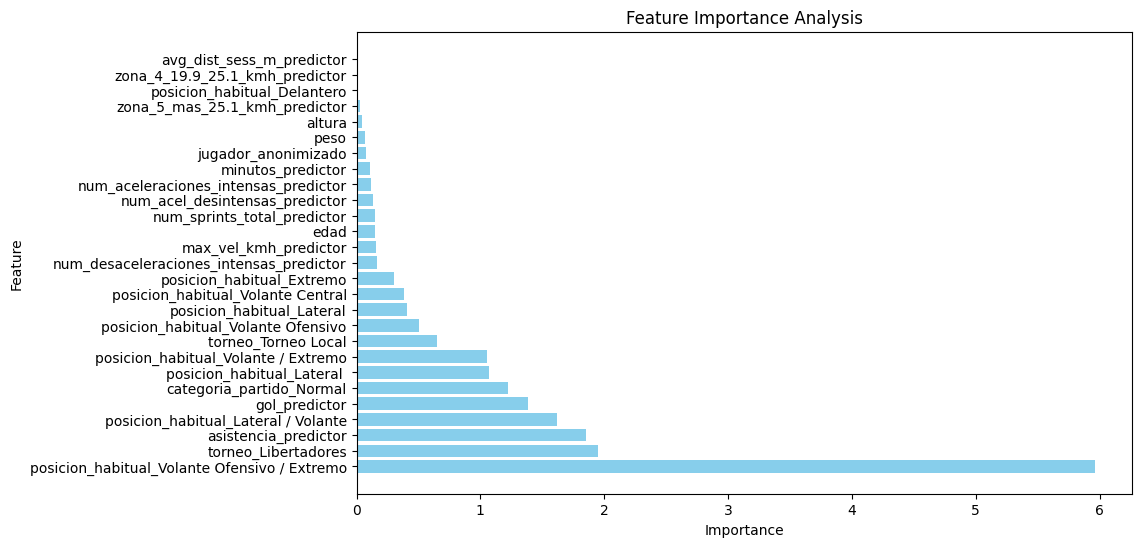

Mean Absolute Error (MAE) 'num_sprints_total': 2.442601996267859
Mean Squared Error (MSE) 'num_sprints_total': 10.265468739025241
Root Mean Squared Error (RMSE) 'num_sprints_total': 3.2039770191162797
R-squared (R²) 'num_sprints_total': 0.08568526038519353
Index(['jugador_anonimizado', 'edad', 'peso', 'altura', 'minutos_predictor',
       'avg_dist_sess_m_predictor', 'zona_4_19.9_25.1_kmh_predictor',
       'zona_5_mas_25.1_kmh_predictor', 'num_aceleraciones_intensas_predictor',
       'num_desaceleraciones_intensas_predictor',
       'num_acel_desintensas_predictor', 'num_sprints_total_predictor',
       'max_vel_kmh_predictor', 'gol_predictor', 'asistencia_predictor',
       'torneo_Libertadores', 'torneo_Torneo Local',
       'categoria_partido_Normal', 'posicion_habitual_Delantero',
       'posicion_habitual_Extremo', 'posicion_habitual_Lateral',
       'posicion_habitual_Lateral ', 'posicion_habitual_Lateral / Volante',
       'posicion_habitual_Volante / Extremo',
       'posicio

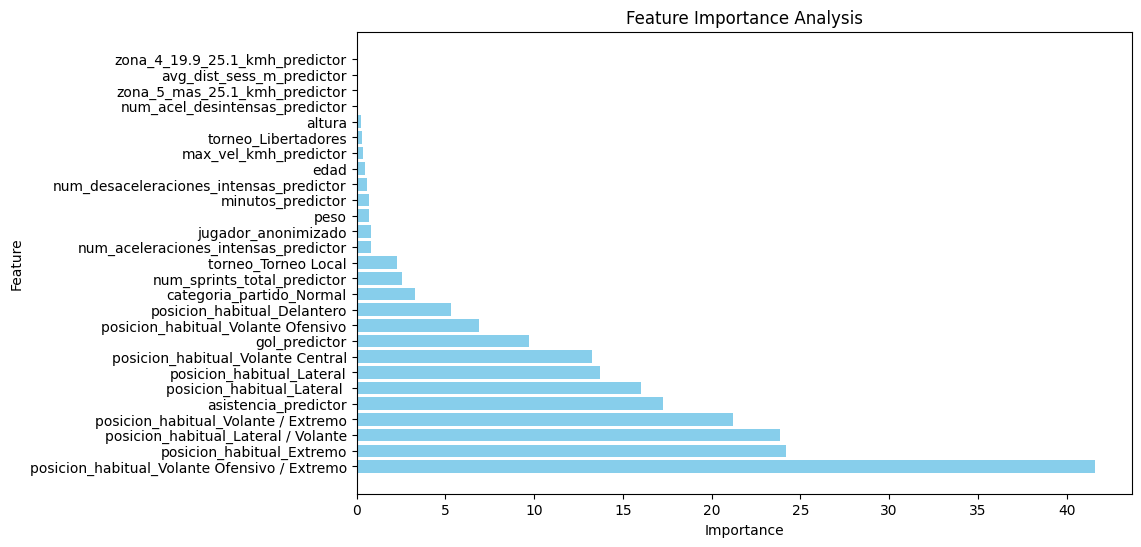

Mean Absolute Error (MAE) 'max_vel_kmh': 4.452535164200573
Mean Squared Error (MSE) 'max_vel_kmh': 25.14564739294643
Root Mean Squared Error (RMSE) 'max_vel_kmh': 5.014543587700323
R-squared (R²) 'max_vel_kmh': -3.428837466926315


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

all_top_features = []

df2 = train_df.copy()
df3 = test_df.copy()

# Lista de columnas objetivo y sus límites
targets = {
    'minutos': (10, 100),
    'avg_dist_sess_m': (0, 12000),
    'zona_4_19.9_25.1_kmh': (0, 1122),
    'zona_5_mas_25.1_kmh': (0, 542),
    'num_aceleraciones_intensas': (0, 120),
    'num_desaceleraciones_intensas': (0, 140),
    'num_acel_desintensas': (0, 250),
    'num_sprints_total': (0, 30),
    'max_vel_kmh': (25, 33)
}

categorical_cols = [
    'torneo',
    'categoria_partido',
    'posicion_habitual'
]

df2 = df2.drop(['fecha', 'num_fecha_torneo', 'posicion', 'rival', 'tiempo', 'prom_esfuerzos_repetidos', 'gol', 'asistencia'], axis=1)
df3 = df3.drop(['fecha', 'num_fecha_torneo', 'posicion', 'rival', 'tiempo', 'prom_esfuerzos_repetidos', 'gol', 'asistencia'], axis=1)

df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)
df3 = pd.get_dummies(df3, columns=categorical_cols, drop_first=True)



for target, (lower_limit, upper_limit) in targets.items():
    features = [col for col in df2.columns if col != target and col not in targets]
    features3 = [col for col in df3.columns if col != target and col not in targets]

    X_train = df2[features]
    print(X_train.columns)
    y_train = df2[target]
    X_test = df3[features3]
    y_test = df3[target]

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_pred = np.clip(y_pred, lower_limit, upper_limit)

    predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

    coefficients = model.coef_
    print(predictions_df.head(5))

    coef_abs = np.abs(coefficients)

    sorted_indices = np.argsort(coef_abs)[::-1]

    feature_names = X_train.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coef_abs})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Analysis')
    plt.show()


    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE) '{target}': {mae}")

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE) '{target}': {mse}")

    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE) '{target}': {rmse}")

    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²) '{target}': {r2}")

In [ ]:
from collections import Counter

feature_counts = Counter(all_top_features)
most_common_features = feature_counts.most_common()

print("Características más comunes en top_features:")
for feature, count in most_common_features:
    print(f"{feature}: {count} veces")

Características más comunes en top_features:
posicion_habitual_Volante Ofensivo / Extremo: 9 veces
asistencia_predictor: 6 veces
posicion_habitual_Lateral / Volante: 5 veces
posicion_habitual_Extremo: 3 veces
torneo_Libertadores: 3 veces
posicion_habitual_Volante Ofensivo: 2 veces
categoria_partido_Normal: 2 veces
gol_predictor: 2 veces
posicion_habitual_Lateral : 2 veces
posicion_habitual_Volante Central: 1 veces
asistencia: 1 veces


## Modelo 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import pandas as pd

In [ ]:
targets = {
    'minutos': (0, 100),
    'avg_dist_sess_m': (0, 12000),
    'zona_4_19.9_25.1_kmh': (0, 1122),
    'zona_5_mas_25.1_kmh': (0, 542),
    'num_aceleraciones_intensas': (0, 120),
    'num_desaceleraciones_intensas': (0, 140),
    'num_acel_desintensas': (0, 250),
    'num_sprints_total': (0, 30),
    'prom_esfuerzos_repetidos': (0, 30),
    'max_vel_kmh': (0, 33)
}

In [ ]:
all_top_features = []

df2 = train_df.copy()
df3 = test_df.copy()

# Columnas categóricas que necesitan codificación
categorical_cols = [
    'torneo',
    'categoria_partido',
    'posicion_habitual'
]

drop_cols = ['fecha', 'num_fecha_torneo', 'posicion', 'rival', 'tiempo']
df2 = df2.drop(columns=drop_cols, errors='ignore')
df3 = df3.drop(columns=drop_cols, errors='ignore')

# Realizamos one-hot encoding en columnas categóricas
df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)
df3 = pd.get_dummies(df3, columns=categorical_cols, drop_first=True)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

feature_count = Counter()
results = []

for target , (lower_limit, upper_limit) in targets.items():
    features = [col for col in df2.columns if col != target and col not in targets]
    features3 = [col for col in df3.columns if col != target and col not in targets]

    X_train = df2[features]
    y_train = df2[target]
    X_test = df3[features3]
    y_test = df3[target]

    model = RandomForestRegressor(random_state=42)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

    mse = mean_squared_error(y_test, y_pred)
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'feature': features,
        'importance': feature_importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    top_3_features = feature_importance_df.head(3)['feature']
    feature_count.update(top_3_features)

    results.append({
        'target': target,
        'mse': mse,
        'top_3_features': top_3_features,
        'best_params': grid_search.best_params_
    })

    print(f'Results for {target}:')
    print(f'MSE: {mse}')
    print('Top 3 features:')
    print(top_3_features)
    print('Best parameters:')
    print(grid_search.best_params_)
    print('\n')

Results for minutos:
MSE: 678.4839314898759
Top 3 features:
6                           minutos_predictor
7                   avg_dist_sess_m_predictor
11    num_desaceleraciones_intensas_predictor
Name: feature, dtype: object
Best parameters:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Results for avg_dist_sess_m:
MSE: 7739030.238699035
Top 3 features:
6                           minutos_predictor
7                   avg_dist_sess_m_predictor
11    num_desaceleraciones_intensas_predictor
Name: feature, dtype: object
Best parameters:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Results for zona_4_19.9_25.1_kmh:
MSE: 27335.767370404305
Top 3 features:
8           zona_4_19.9_25.1_kmh_predictor
19                categoria_partido_Normal
10    num_aceleraciones_intensas_predictor
Name: feature, dtype: object
Best parameters:
{'bootstrap': True, 'max_depth': 10, 'm

Final Results for minutos:
Final MSE: 678.4839314898759
Final MAE: 22.1386858554738
Final MedAE: 20.352726199067526
Final r2: 0.34042373813463633




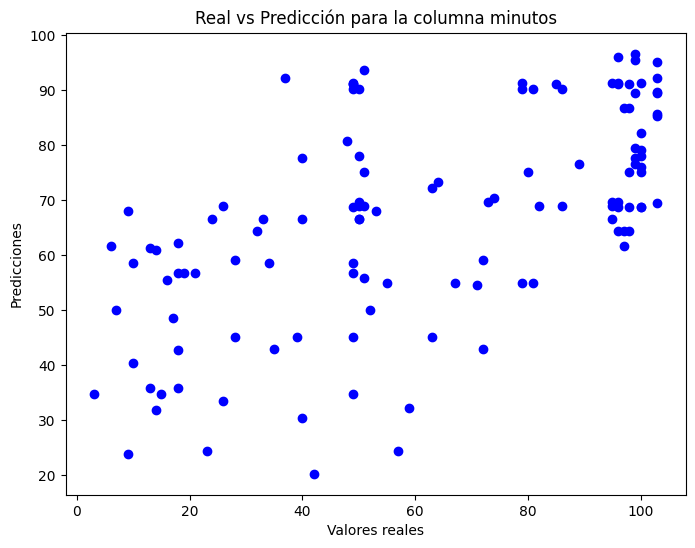

Final Results for avg_dist_sess_m:
Final MSE: 7739030.238699035
Final MAE: 2336.0857802153214
Final MedAE: 2200.3063434781657
Final r2: 0.295665031907442




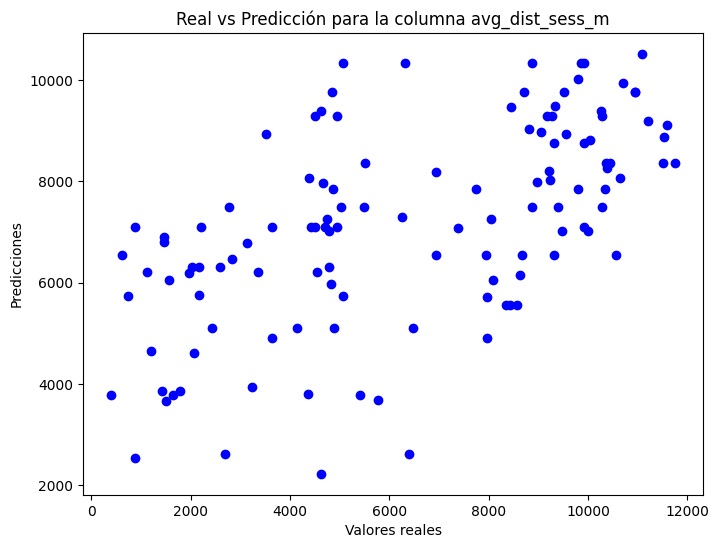

Final Results for zona_4_19.9_25.1_kmh:
Final MSE: 27335.767370404305
Final MAE: 137.50983124572588
Final MedAE: 127.29901155670856
Final r2: 0.32093302737174434




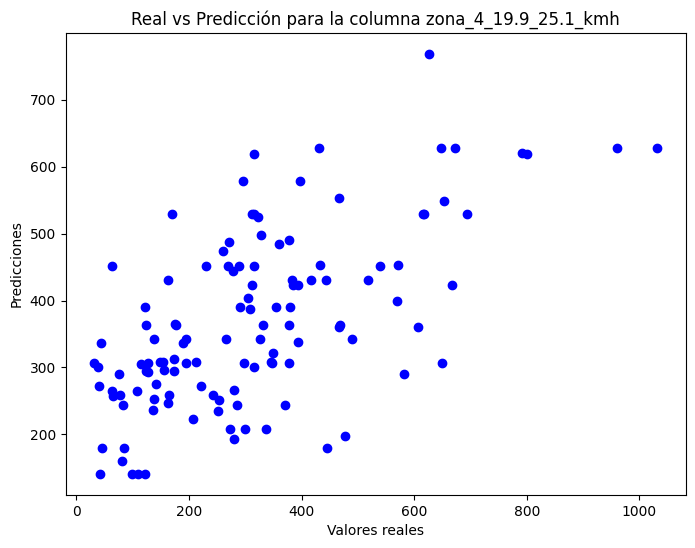

Final Results for zona_5_mas_25.1_kmh:
Final MSE: 3245.900539929285
Final MAE: 42.141698310071114
Final MedAE: 31.27505523874713
Final r2: 0.24058486857878847




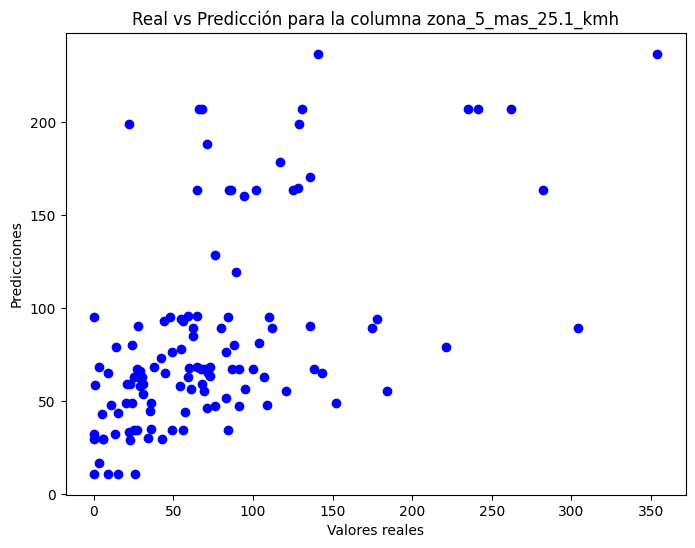

Final Results for num_aceleraciones_intensas:
Final MSE: 368.1622459923596
Final MAE: 15.614551894766484
Final MedAE: 13.317980683492806
Final r2: 0.2109398804325031




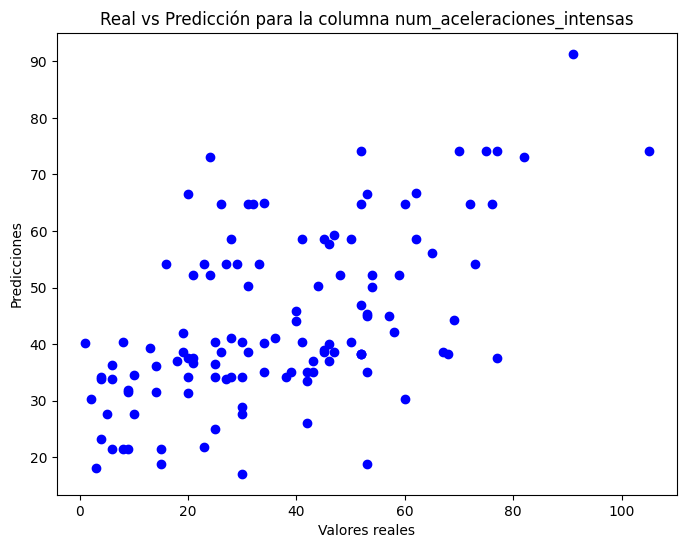

Final Results for num_desaceleraciones_intensas:
Final MSE: 491.4583328119801
Final MAE: 18.4066560599655
Final MedAE: 15.884619828719394
Final r2: 0.27236154280199176




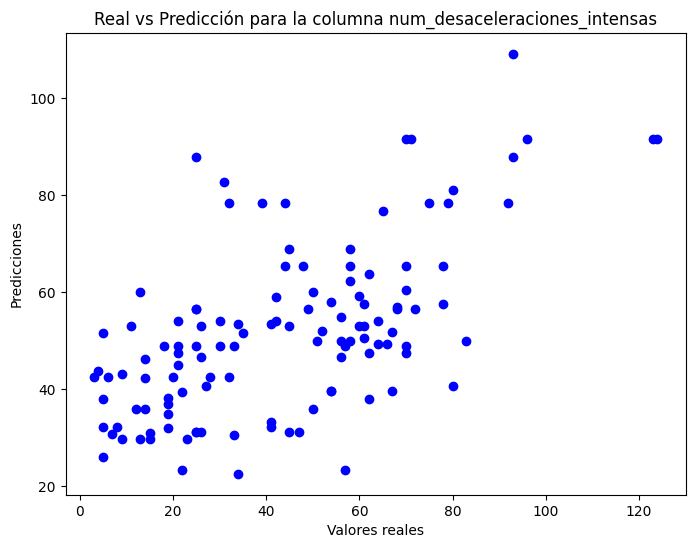

Final Results for num_acel_desintensas:
Final MSE: 1641.444346473544
Final MAE: 33.51691970378423
Final MedAE: 29.00113523181848
Final r2: 0.2535264177625709




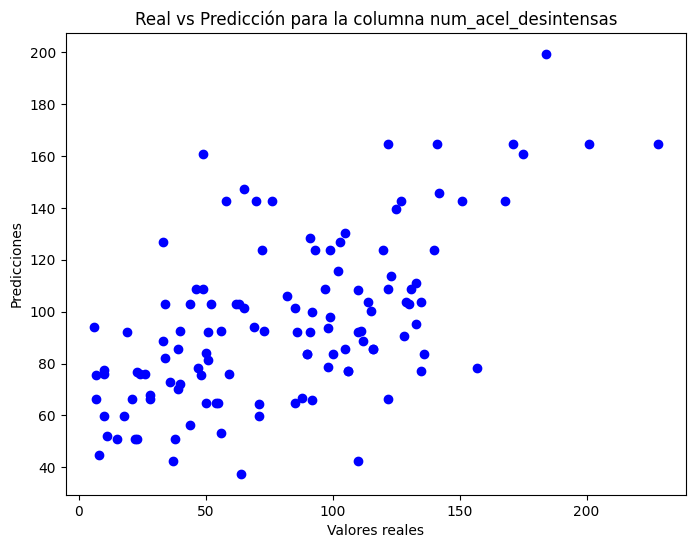

Final Results for num_sprints_total:
Final MSE: 10.42465404682665
Final MAE: 2.445766554352081
Final MedAE: 2.0
Final r2: 0.0715070989243689




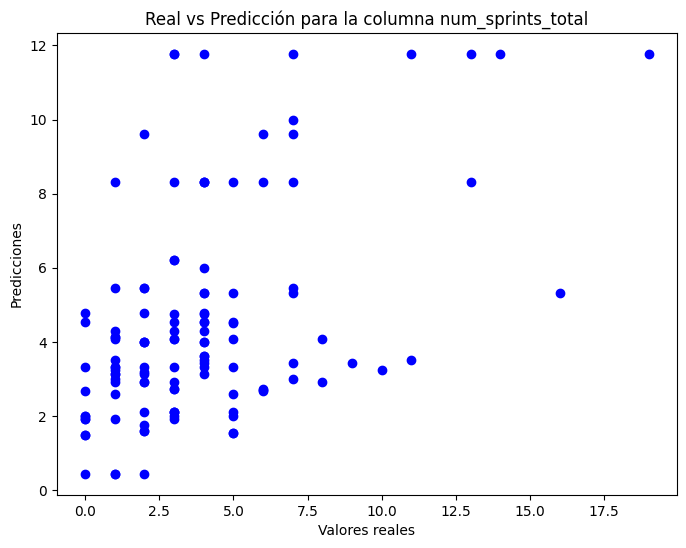

Final Results for prom_esfuerzos_repetidos:
Final MSE: 39.15165724643166
Final MAE: 4.872510648168137
Final MedAE: 3.6824583417853347
Final r2: 0.08333192797069455




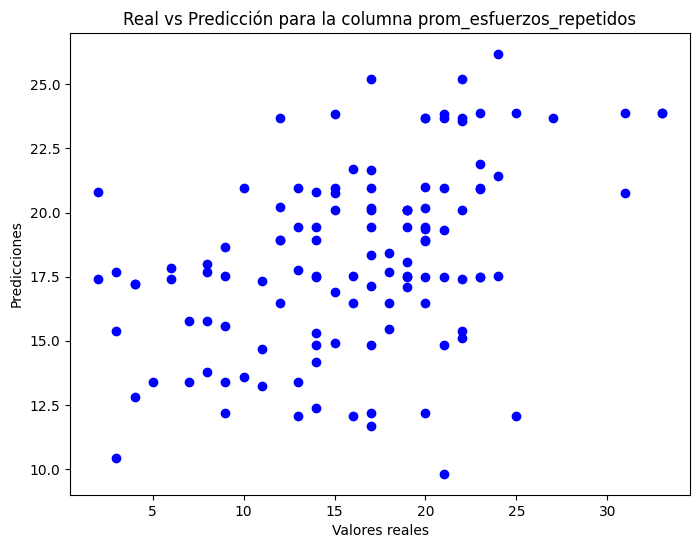

Final Results for max_vel_kmh:
Final MSE: 311.946334742746
Final MAE: 14.433288212578615
Final MedAE: 17.0
Final r2: -0.5233619364266602




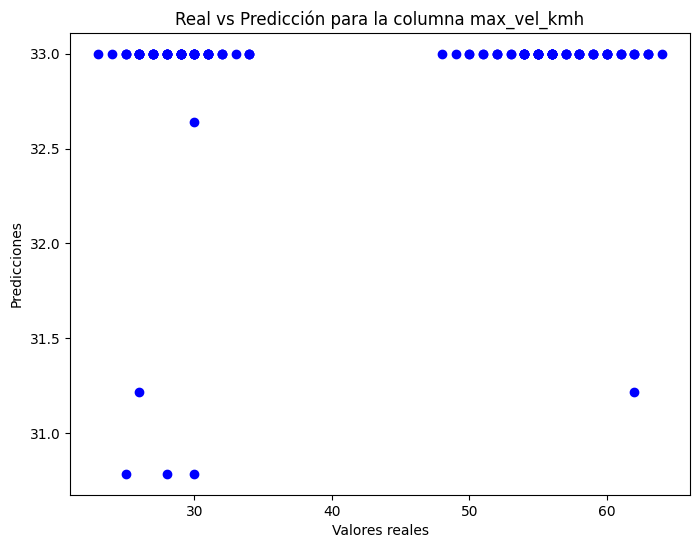

In [ ]:
final_predictions_all_targets = []

for result in results:
    target = result['target']
    best_params = result['best_params']
    lower_limit, upper_limit = targets[target]
    features = [col for col in df2.columns if col != target and col not in targets]

    X_train = df2[features]
    y_train = df2[target]
    X_test = df3[features]
    y_test = df3[target]

    final_model = RandomForestRegressor(**best_params, random_state=42)

    final_model.fit(X_train, y_train)

    y_pred = final_model.predict(X_test)
    y_pred = np.clip(y_pred, lower_limit, upper_limit)

    final_mse = mean_squared_error(y_test, y_pred)
    final_mae = mean_absolute_error(y_test, y_pred)
    final_medae = median_absolute_error(y_test, y_pred)
    final_r2 = r2_score(y_test, y_pred)

    print(f'Final Results for {target}:')
    print(f'Final MSE: {final_mse}')
    print(f'Final MAE: {final_mae}')
    print(f'Final MedAE: {final_medae}')
    print(f'Final r2: {final_r2}')
    print('\n')

    final_predictions_df = pd.DataFrame({
        'Real': y_test,
        'Predicción': y_pred,
        'Target': target
    })
    final_predictions_all_targets.append(final_predictions_df)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.title(f'Real vs Predicción para la columna {target}')
    plt.xlabel('Valores reales')
    plt.ylabel('Predicciones')
    plt.show()

final_predictions_all_targets_df = pd.concat(final_predictions_all_targets, ignore_index=True)

In [ ]:
feature_count_df = pd.DataFrame.from_dict(feature_count, orient='index', columns=['count'])
feature_count_df = feature_count_df.sort_values(by='count', ascending=False)

print('Feature appearance count in top 3 features across all targets:')
print(feature_count_df)

Feature appearance count in top 3 features across all targets:
                                         count
num_desaceleraciones_intensas_predictor      5
num_aceleraciones_intensas_predictor         5
num_acel_desintensas_predictor               4
minutos_predictor                            3
avg_dist_sess_m_predictor                    3
categoria_partido_Normal                     3
zona_4_19.9_25.1_kmh_predictor               2
zona_5_mas_25.1_kmh_predictor                2
num_sprints_total_predictor                  2
torneo_Torneo Local                          1


In [ ]:
print(final_predictions_all_targets_df)

      Real  Predicción       Target
0       50   66.524807      minutos
1       99   79.487435      minutos
2       40   66.524807      minutos
3       37   92.259076      minutos
4       95   66.524807      minutos
...    ...         ...          ...
1195    55   33.000000  max_vel_kmh
1196    26   31.218123  max_vel_kmh
1197    62   31.218123  max_vel_kmh
1198    32   33.000000  max_vel_kmh
1199    25   33.000000  max_vel_kmh

[1200 rows x 3 columns]


In [ ]:
final_predictions_all_targets_df.to_excel('random_forest.xlsx', index=False)

# Modelo 3: XGBoost

In [19]:
pip install xgboost

In [29]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [21]:
targets = {
    'minutos': (0, 100),
    'avg_dist_sess_m': (0, 12000),
    'zona_4_19.9_25.1_kmh': (0, 1122),
    'zona_5_mas_25.1_kmh': (0, 542),
    'num_aceleraciones_intensas': (0, 120),
    'num_desaceleraciones_intensas': (0, 140),
    'num_acel_desintensas': (0, 250),
    'num_sprints_total': (0, 30),
    'prom_esfuerzos_repetidos': (0, 30),
    'max_vel_kmh': (0, 33)
}

In [22]:
all_top_features = []

df2 = train_df.copy()
df3 = test_df.copy()

categorical_cols = [
    'torneo',
    'categoria_partido',
    'posicion_habitual'
]

drop_cols = ['fecha', 'num_fecha_torneo', 'posicion', 'rival', 'tiempo']
df2 = df2.drop(columns=drop_cols, errors='ignore')
df3 = df3.drop(columns=drop_cols, errors='ignore')

df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)
df3 = pd.get_dummies(df3, columns=categorical_cols, drop_first=True)

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

feature_count = Counter()
results = []

for target , (lower_limit, upper_limit) in targets.items():
    features = [col for col in df2.columns if col != target and col not in targets]
    features3 = [col for col in df3.columns if col != target and col not in targets]

    X_train = df2[features]
    y_train = df2[target]
    X_test = df3[features3]
    y_test = df3[target]

    model = XGBRegressor()

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

    mse = mean_squared_error(y_test, y_pred)
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'feature': features,
        'importance': feature_importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    top_3_features = feature_importance_df.head(3)['feature']
    feature_count.update(top_3_features)

    results.append({
        'target': target,
        'mse': mse,
        'top_3_features': top_3_features,
        'best_params': grid_search.best_params_
    })

    print(f'Results for {target}:')
    print(f'MSE: {mse}')
    print('Top 3 features:')
    print(top_3_features)
    print('Best parameters:')
    print(grid_search.best_params_)
    print('\n')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Results for minutos:
MSE: 631.5045641140932
Top 3 features:
6                  minutos_predictor
7          avg_dist_sess_m_predictor
12    num_acel_desintensas_predictor
Name: feature, dtype: object
Best parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Results for avg_dist_sess_m:
MSE: 7043333.326191773
Top 3 features:
7                   avg_dist_sess_m_predictor
6                           minutos_predictor
11    num_desaceleraciones_intensas_predictor
Name: feature, dtype: object
Best parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Results for zona_4_19.9_25.1_kmh:
MSE: 28186.87998037204
Top 3 features:
10    num_ac

Final Results for minutos:
Final MSE: 634.0899348124939
Final MAE: 21.49359736442566
Final MedAE: 19.79528045654297
Final r2: 0.3835805838884224




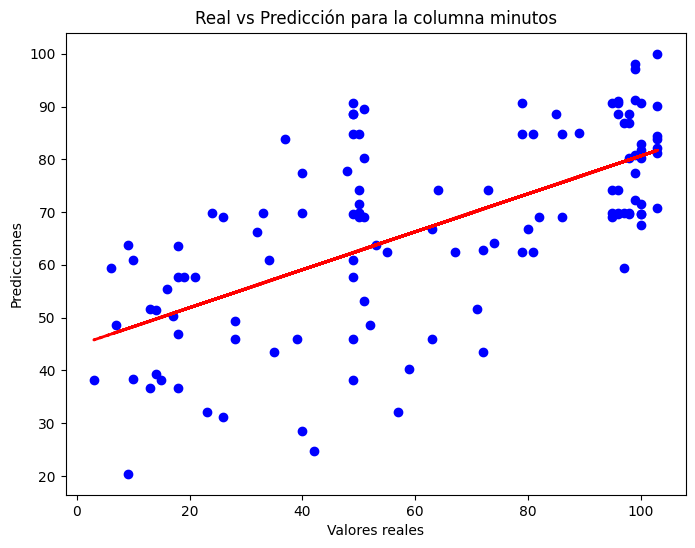

Final Results for avg_dist_sess_m:
Final MSE: 7259774.273465336
Final MAE: 2256.258614095052
Final MedAE: 1997.81005859375
Final r2: 0.33928247809509116




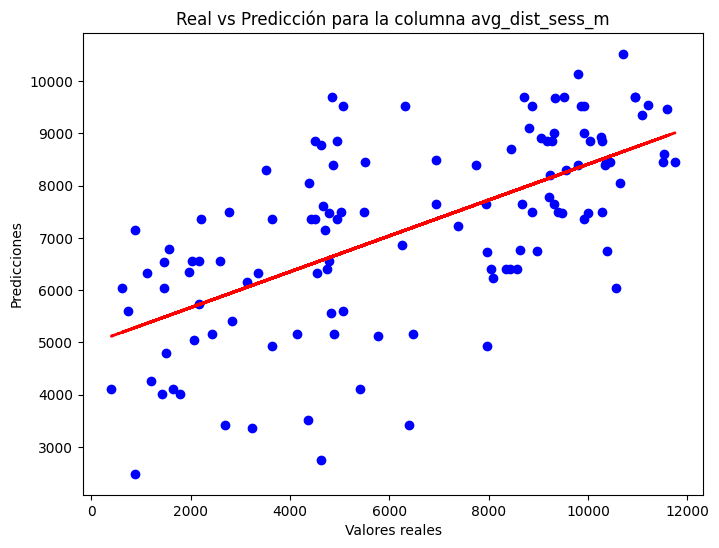

Final Results for zona_4_19.9_25.1_kmh:
Final MSE: 26787.676110148113
Final MAE: 137.35743115743
Final MedAE: 133.45166015625
Final r2: 0.3345485468405389




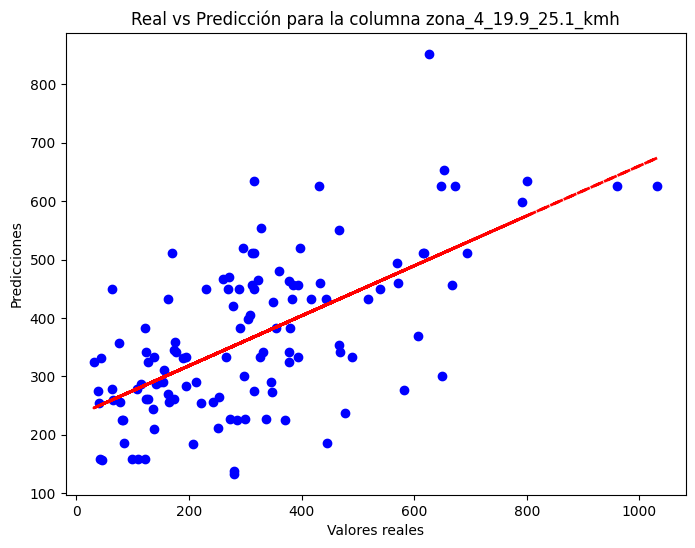

Final Results for zona_5_mas_25.1_kmh:
Final MSE: 3263.225321248421
Final MAE: 41.97347601254781
Final MedAE: 34.2302360534668
Final r2: 0.23653154010477362




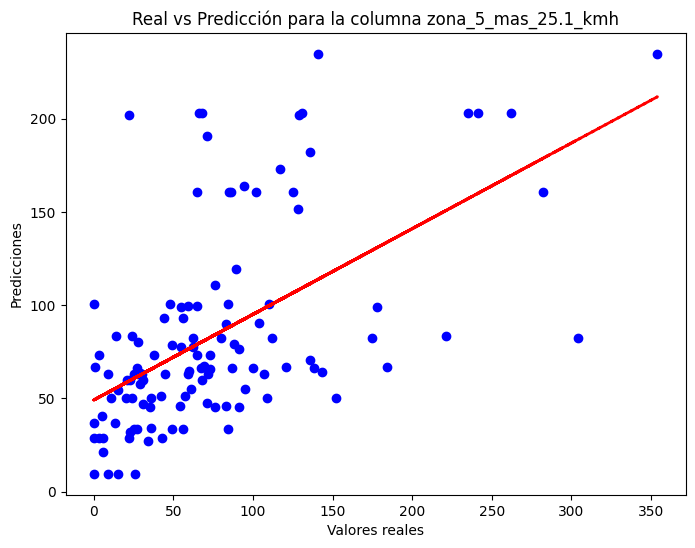

Final Results for num_aceleraciones_intensas:
Final MSE: 368.5102618986778
Final MAE: 15.527385346094768
Final MedAE: 13.250713348388672
Final r2: 0.21019399875767075




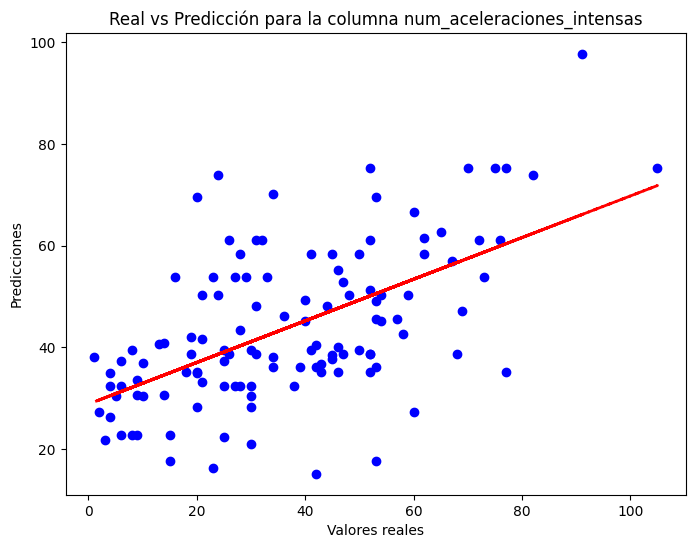

Final Results for num_desaceleraciones_intensas:
Final MSE: 491.581026461618
Final MAE: 18.3680109500885
Final MedAE: 17.04002571105957
Final r2: 0.27217988626679845




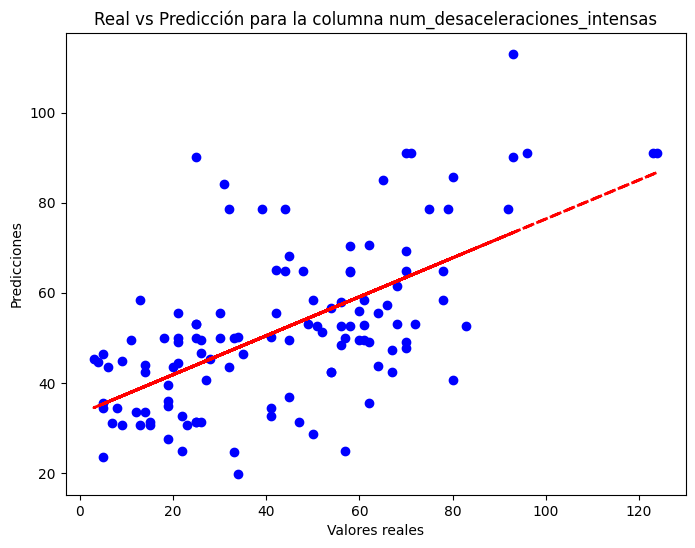

Final Results for num_acel_desintensas:
Final MSE: 1578.1957367330692
Final MAE: 32.205705897013345
Final MedAE: 28.277679443359375
Final r2: 0.28228975438494375




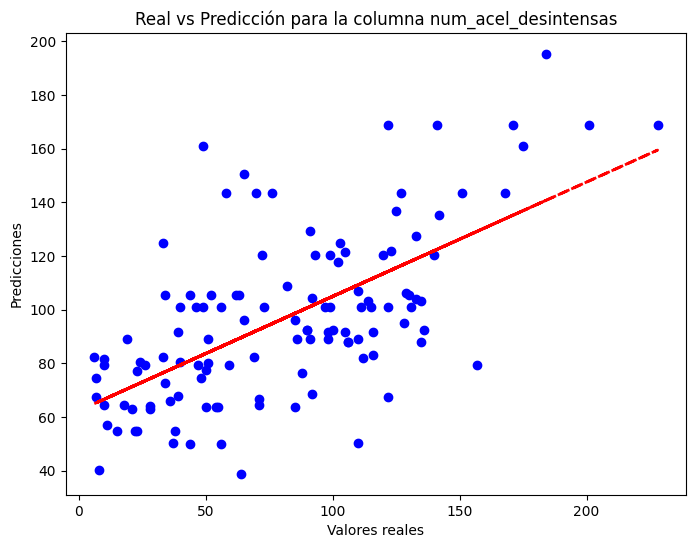

Final Results for num_sprints_total:
Final MSE: 10.229334987805105
Final MAE: 2.3992618645230928
Final MedAE: 1.9180949926376343
Final r2: 0.0889035860338363




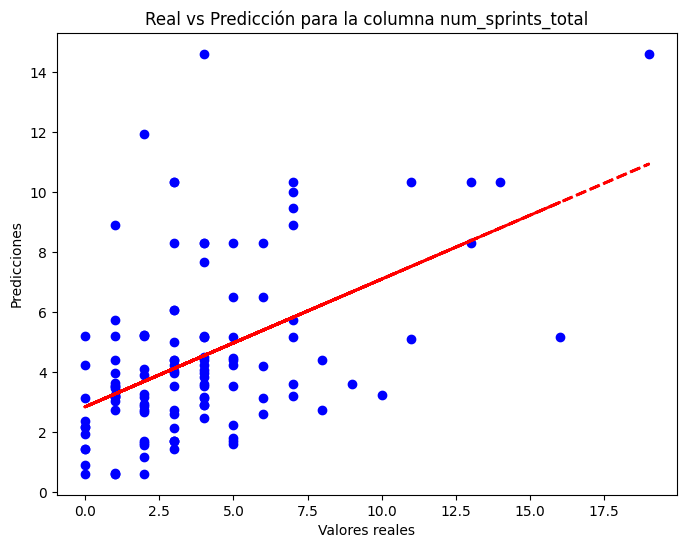

Final Results for prom_esfuerzos_repetidos:
Final MSE: 38.52570805490936
Final MAE: 4.743970799446106
Final MedAE: 3.574215888977051
Final r2: 0.09798744140067461




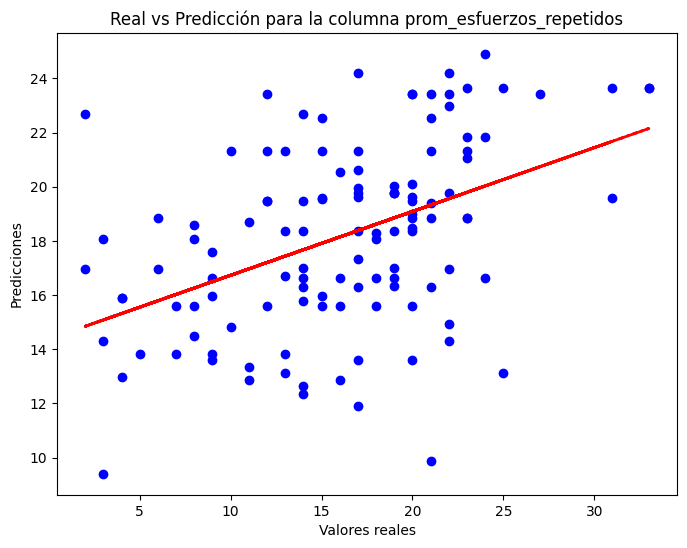

Final Results for max_vel_kmh:
Final MSE: 4.108600490598444
Final MAE: 1.5538435459136963
Final MedAE: 1.1560039520263672
Final r2: 0.2763628828065706




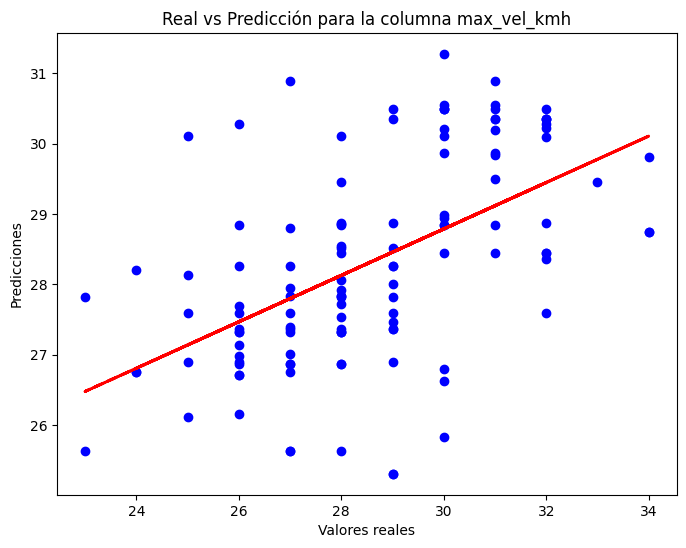

In [35]:
final_predictions_all_targets = []

for result in results:
    target = result['target']
    best_params = result['best_params']
    lower_limit, upper_limit = targets[target]
    features = [col for col in df2.columns if col != target and col not in targets]

    X_train = df2[features]
    y_train = df2[target]
    X_test = df3[features]
    y_test = df3[target]

    final_model = XGBRegressor(**best_params, random_state=42)

    final_model.fit(X_train, y_train)

    y_pred = final_model.predict(X_test)
    y_pred = np.clip(y_pred, lower_limit, upper_limit)

    final_mse = mean_squared_error(y_test, y_pred)
    final_mae = mean_absolute_error(y_test, y_pred)
    final_medae = median_absolute_error(y_test, y_pred)
    final_r2 = r2_score(y_test, y_pred)

    print(f'Final Results for {target}:')
    print(f'Final MSE: {final_mse}')
    print(f'Final MAE: {final_mae}')
    print(f'Final MedAE: {final_medae}')
    print(f'Final r2: {final_r2}')
    print('\n')

    final_predictions_df = pd.DataFrame({
        'Real': y_test,
        'Predicción': y_pred,
        'Target': target
    })
    final_predictions_all_targets.append(final_predictions_df)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.title(f'Real vs Predicción para la columna {target}')
    plt.xlabel('Valores reales')
    plt.ylabel('Predicciones')

    z = np.polyfit(y_test, y_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), color='red', linestyle='--', linewidth=2)


    plt.show()

final_predictions_all_targets_df = pd.concat(final_predictions_all_targets, ignore_index=True)





In [31]:
feature_count_df = pd.DataFrame.from_dict(feature_count, orient='index', columns=['count'])
feature_count_df = feature_count_df.sort_values(by='count', ascending=False)

print('Feature appearance count in top 3 features across all targets:')
print(feature_count_df)

Feature appearance count in top 3 features across all targets:
                                              count
num_aceleraciones_intensas_predictor              6
num_acel_desintensas_predictor                    4
zona_5_mas_25.1_kmh_predictor                     4
avg_dist_sess_m_predictor                         3
num_desaceleraciones_intensas_predictor           3
zona_4_19.9_25.1_kmh_predictor                    3
minutos_predictor                                 2
num_sprints_total_predictor                       2
peso                                              1
posicion_habitual_Volante Ofensivo / Extremo      1
altura                                            1


In [32]:
print(final_predictions_all_targets_df)

      Real  Predicción       Target
0       50   69.795280      minutos
1       99   80.789169      minutos
2       40   69.795280      minutos
3       37   83.914383      minutos
4       95   69.795280      minutos
...    ...         ...          ...
1195    26   26.706631  max_vel_kmh
1196    26   30.284874  max_vel_kmh
1197    32   30.284874  max_vel_kmh
1198    32   28.358679  max_vel_kmh
1199    25   28.130033  max_vel_kmh

[1200 rows x 3 columns]
